In [ ]:
### Install Requirement
!pip install -r requirements.txt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
<module 'util_feature' from 'D:\\_devs\\Python01\\gitdev\\da\\da\\test01\\util_feature.py'>


# Init

In [190]:
%load_ext autoreload
%autoreload

### Local Import
import util_model
import util_feature
import util_plot
import util_text
import util_date

print(util_feature)




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
<module 'util_feature' from 'D:\\_devs\\Python01\\gitdev\\da\\da\\test01\\util_feature.py'>


In [44]:
%load_ext autoreload
%autoreload
%matplotlib inline
%config IPCompleter.greedy=True



import gc, os, sys, copy, string, logging
from datetime import datetime
import warnings
import numpy as np, pandas as pd, sklearn as sk

import seaborn as sns
import matplotlib.pyplot as plt

import lightgbm as lgb
from tqdm import tqdm_notebook

warnings.filterwarnings('ignore')




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
from sklearn import covariance, linear_model, model_selection, preprocessing
from sklearn.cluster import dbscan, k_means
from sklearn.decomposition import PCA, pca, TruncatedSVD, LatentDirichletAllocation, NMF

from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis,
                                           QuadraticDiscriminantAnalysis)
from sklearn.ensemble import (AdaBoostClassifier, ExtraTreesClassifier,
                              GradientBoostingClassifier,
                              RandomForestClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, make_scorer,
                             mean_absolute_error, roc_auc_score, roc_curve)
from sklearn.model_selection import (GridSearchCV, KFold, StratifiedKFold,
                                     cross_val_score, train_test_split)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



In [52]:
### Local Import
import util_model
import util_feature
import util_plot
import util_text
import util_date

print(util_feature)





<module 'util_feature' from 'D:\\_devs\\Python01\\gitdev\\da\\da\\test01\\util_feature.py'>


# Data Loading, basic profiling

In [5]:
folder = os.getcwd() + "/"
folder_model = folder + "/models/model01/"
folder_out = folder + "/out"



In [6]:
df = pd.read_csv(folder+'news_train.csv', delimiter=',')





In [7]:
df.describe()


,y
count,2034.000000
mean,1.426254
std,1.042963
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,3.000000


In [8]:
 df.shape, df.columns, df.dtypes

((2034, 2), Index(['news', 'y'], dtype='object'), news    object
 y        int64
 dtype: object)

In [9]:
### Pandas Profiling for features
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import pandas_profiling as pp
profile =  df.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file= folder + "pandas_report_output2.html")


colexclude = profile.get_rejected_variables(threshold=0.98)
colexclude 



[]

In [8]:
colexclude = profile.get_rejected_variables(threshold=0.98)
colexclude 



['name_trigram_simple']

In [10]:
df["id"] = np.arange(0, len(df))

# Column selection by type

In [11]:
colid = "id"
colnum = [ 
         ]


colcat = [  ]


coltext = [ "news" ]


coldate = [ ]



coly = "y"


colall = colnum + colcat + coltext + coldate

"""

dfnum, dfcat, dfnum_bin, 
dfnum_binhot,  dfcat_hot

colnum, colcat, coltext, 
colnum_bin, colnum_binhot,  

"""

print(colall )


['news']


In [12]:
df = df.set_index( colid )


In [13]:
df[colall].head(2)

,news
id,
0,"Hi,\n\nI've noticed that if you only save a mo..."
1,"\n\nSeems to be, barring evidence to the contr..."


# Data type normalization, Encoding process (numerics, category)

In [19]:
#Normalize to NA, NA Handling
# df = df.replace("?", np.nan)

colall


['review_scores_communication',
 'review_scores_location',
 'review_scores_rating',
 'phone_equality',
 'fax_equality',
 'street_number_equality',
 'house_rules',
 'neighborhood_overview',
 'notes',
 'street',
 'calendar_last_scraped',
 'first_review',
 'host_since']

In [22]:
### colnum procesing 
for x in colnum :
    df[x] = df[x].astype("float32")

print( df[colall].dtypes )

review_scores_communication    float32
review_scores_location         float32
review_scores_rating           float32
cancellation_policy             object
host_response_rate              object
host_response_time              object
house_rules                     object
neighborhood_overview           object
notes                           object
street                          object
calendar_last_scraped           object
first_review                    object
host_since                      object
dtype: object


In [121]:
##### Colcat processing 
colcat_map = pd_colcat_mapping(df, colcat) 
                
#for col in colcat :
#    df[col] =  df[col].apply(lambda x : colcat_map["cat_map"][col].get(x)  )

print( df[colcat].dtypes , colcat_map)



phone_equality            int64
fax_equality              int64
street_number_equality    int64
dtype: object {'cat_map': {'phone_equality': {0: 0, 1: 1, 2: 2}, 'fax_equality': {0: 0, 1: 1, 2: 2}, 'street_number_equality': {0: 0, 1: 1, 2: 2}}, 'cat_map_inverse': {'phone_equality': {0: 0, 1: 1, 2: 2}, 'fax_equality': {0: 0, 1: 1, 2: 2}, 'street_number_equality': {0: 0, 1: 1, 2: 2}}}


In [35]:
#coly processing
def pd_str_clean( df, coly) :
    return    df[ coly].apply( lambda x : float( x.replace("$", "")) )

df[ coly ] = pd_str_clean(df, coly)


# Data Distribution after encoding/ data type normalization

In [33]:
#### ColTarget Distribution
coly_stat = util_feature.pd_stat_distribution( df[  [ df.columns[0] , coly ]] ,  subsample_ratio= 1.0)
coly_stat




Univariate distribution
news must be str, not float


,col,n,n_na,n_notna,n_na_pct,nunique,nunique_pct,xmin,xmin_freq,xmin_pct,xmax,xmax_freq,xmax_pct,xmed,xmed_freq,xmed_pct
0,y,2034.0,0.0,2034,0.0,4,0.001967,0,480,0.235988,3,377,0.185349,1.0,584,0.287119


In [38]:
#### Col numerics distribution
colnum_stat = util_feature.pd_stat_distribution(df[colnum],  subsample_ratio= 0.6)
colnum_stat



Univariate distribution


,col,n,n_na,n_notna,n_na_pct,nunique,nunique_pct,xmin,xmin_freq,xmin_pct,xmax,xmax_freq,xmax_pct,xmed,xmed_freq,xmed_pct
0,review_scores_communication,272.0,10.0,262,0.036765,5,0.018382,2.0,1,0.003676,10.0,187,0.687500,10.0,187,0.687500
1,review_scores_location,272.0,10.0,262,0.036765,5,0.018382,6.0,2,0.007353,10.0,151,0.555147,10.0,151,0.555147
2,review_scores_rating,272.0,10.0,262,0.036765,22,0.080882,75.0,1,0.003676,100.0,28,0.102941,95.0,19,0.069853


In [33]:
#### Col stats distribution
colcat_stat = pd_stat_distribution(df[colcat], subsample_ratio= 0.3)
colcat_stat




Univariate distribution


,col,n,n_na,n_notna,n_na_pct,nunique,nunique_pct,xmin,xmin_freq,xmin_pct,xmax,xmax_freq,xmax_pct,xmed,xmed_freq,xmed_pct
0,phone_equality,8470.0,0.0,8470,0.0,3,0.000354,0,4946,0.583943,2,2322,0.274144,0.0,4946,0.583943
1,fax_equality,8470.0,0.0,8470,0.0,3,0.000354,0,8258,0.974970,2,109,0.012869,0.0,8258,0.974970
2,street_number_equality,8470.0,0.0,8470,0.0,3,0.000354,0,236,0.027863,2,4214,0.497521,1.0,4020,0.474616


# Feature processing (strategy 1)

In [14]:
### BAcKUP data before Pre-processing
dfref = copy.deepcopy( df )
print(dfref.shape)

(2034, 2)


In [27]:
"""
Many strategies are possible :
   1) Feature selection before the model
   2) Feature selection using model accuracy.
   
Unless of those cases :
   variable with correl > 99% (ie > imablance class %).
   variable with variance of 0 (as 0).
   Its better to keep all variables at 1st.
   Only Linear model (ie Regression, Logitsic) : 




"""




## Colnum

In [124]:
## Map numerics to Category bin
dfnum, colnum_binmap = pd_colnum_tocat(df, colname=colnum, colexclude=None, colbinmap=None,
                                  bins=5, suffix="_bin",    method="uniform",
                                  return_val="dataframe,param")


print(colnum_binmap)

name_levenshtein_simple
                            name_levenshtein_simple                           
                                                min   size      mean       max
name_levenshtein_simple_bin                                                   
0                                               0.0   3244  0.133234  0.199916
1                                               0.2   4352  0.284679  0.399802
2                                               0.4   4713  0.495519  0.599206
3                                               0.6   4992  0.679888  0.797778
4                                               0.8  10934  0.945298  1.000000
name_trigram_simple
                        name_trigram_simple                           
                                        min   size      mean       max
name_trigram_simple_bin                                               
0                                       0.0   6913  0.034203  0.199356
1                                       

 4                             1.000000  
street_trigram_simple
                          street_trigram_simple                           
                                            min   size      mean       max
street_trigram_simple_bin                                                 
-1                                          NaN  19997       NaN       NaN
 0                                          0.0   1669  0.038069  0.198485
 1                                          0.2   1020  0.281841  0.399669
 2                                          0.4    575  0.499309  0.596875
 3                                          0.6   1026  0.706532  0.793651
 4                                          0.8   3948  0.958941  1.000000
street_levenshtein_term
                            street_levenshtein_term                           
                                                min   size      mean       max
street_levenshtein_term_bin                                                   


 4                             1.000000  
street_number_trigram
                          street_number_trigram                           
                                            min   size      mean       max
street_number_trigram_bin                                                 
-1                                          NaN   9852       NaN       NaN
 0                                          0.0    551  0.073064  0.181818
 1                                          0.2   3084  0.270634  0.375000
 2                                          0.4    684  0.447116  0.571429
 4                                          1.0  14064  1.000000  1.000000
OrderedDict([('name_levenshtein_simple', [-0.0001, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0]), ('name_trigram_simple', [-0.0001, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0]), ('name_levenshtein_term', [-0.0001, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0]), ('name_trigram_term', [-0.0001, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0]), ('city_levensht

In [125]:
colnum_bin =  [  x + "_bin" for x in  list( colnum_map.keys() )   ]
print( colnum_bin )




['name_levenshtein_simple_bin', 'name_trigram_simple_bin', 'name_levenshtein_term_bin', 'name_trigram_term_bin', 'city_levenshtein_simple_bin', 'city_trigram_simple_bin', 'city_levenshtein_term_bin', 'city_trigram_term_bin', 'zip_levenshtein_simple_bin', 'zip_trigram_simple_bin', 'zip_levenshtein_term_bin', 'zip_trigram_term_bin', 'street_levenshtein_simple_bin', 'street_trigram_simple_bin', 'street_levenshtein_term_bin', 'street_trigram_term_bin', 'website_levenshtein_simple_bin', 'website_trigram_simple_bin', 'website_levenshtein_term_bin', 'website_trigram_term_bin', 'phone_levenshtein_bin', 'phone_trigram_bin', 'fax_levenshtein_bin', 'fax_trigram_bin', 'street_number_levenshtein_bin', 'street_number_trigram_bin']


In [169]:
dfnum.columns



Index(['name_levenshtein_simple_bin', 'name_trigram_simple_bin',
       'name_levenshtein_term_bin', 'name_trigram_term_bin',
       'city_levenshtein_simple_bin', 'city_trigram_simple_bin',
       'city_levenshtein_term_bin', 'city_trigram_term_bin',
       'zip_levenshtein_simple_bin', 'zip_trigram_simple_bin',
       'zip_levenshtein_term_bin', 'zip_trigram_term_bin',
       'street_levenshtein_simple_bin', 'street_trigram_simple_bin',
       'street_levenshtein_term_bin', 'street_trigram_term_bin',
       'website_levenshtein_simple_bin', 'website_trigram_simple_bin',
       'website_levenshtein_term_bin', 'website_trigram_term_bin',
       'phone_levenshtein_bin', 'phone_trigram_bin', 'fax_levenshtein_bin',
       'fax_trigram_bin', 'street_number_levenshtein_bin',
       'street_number_trigram_bin'],
      dtype='object')

In [128]:
### numerics bin to One Hot
dfnum_hot, colnum_onehot = pd_col_to_onehot(dfnum[colnum_bin], colname=colnum_bin,
                             colonehot=None, return_val="dataframe,param")
dfnum_hot[ colnum_onehot   ] .head(10)



name_levenshtein_simple_bin 5 (28235, 26)
name_trigram_simple_bin 5 (28235, 30)
name_levenshtein_term_bin 5 (28235, 34)
name_trigram_term_bin 5 (28235, 38)
city_levenshtein_simple_bin 6 (28235, 42)
city_trigram_simple_bin 6 (28235, 47)
city_levenshtein_term_bin 6 (28235, 52)
city_trigram_term_bin 6 (28235, 57)
zip_levenshtein_simple_bin 6 (28235, 62)
zip_trigram_simple_bin 6 (28235, 67)
zip_levenshtein_term_bin 6 (28235, 72)
zip_trigram_term_bin 6 (28235, 77)
street_levenshtein_simple_bin 6 (28235, 82)
street_trigram_simple_bin 6 (28235, 87)
street_levenshtein_term_bin 6 (28235, 92)
street_trigram_term_bin 6 (28235, 97)
website_levenshtein_simple_bin 6 (28235, 102)
website_trigram_simple_bin 6 (28235, 107)
website_levenshtein_term_bin 6 (28235, 112)
website_trigram_term_bin 6 (28235, 117)
phone_levenshtein_bin 6 (28235, 122)
phone_trigram_bin 6 (28235, 127)
fax_levenshtein_bin 6 (28235, 132)
fax_trigram_bin 6 (28235, 137)
street_number_levenshtein_bin 6 (28235, 142)
street_number_trigr

,name_levenshtein_simple_bin_0,name_levenshtein_simple_bin_1,name_levenshtein_simple_bin_2,name_levenshtein_simple_bin_3,name_levenshtein_simple_bin_4,name_trigram_simple_bin_0,name_trigram_simple_bin_1,name_trigram_simple_bin_2,name_trigram_simple_bin_3,name_trigram_simple_bin_4,...,street_number_levenshtein_bin_0,street_number_levenshtein_bin_1,street_number_levenshtein_bin_2,street_number_levenshtein_bin_3,street_number_levenshtein_bin_4,street_number_trigram_bin_-1,street_number_trigram_bin_0,street_number_trigram_bin_1,street_number_trigram_bin_2,street_number_trigram_bin_4
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
5,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
6,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
7,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [202]:
0


0

In [277]:
## To pipeline
#  Save each feature processing into "Reproductible pipeline".
#  For Scalability, for repreoduction process
#  Functionnal appraoch --> Can be converted to Spark
#  For scalbility, and paralell

from util_feature import pd_col_to_num, pd_colnum_tocat, pd_col_to_onehot

pipe_preprocess_colnum =[ 
           (util_feature.pd_col_to_num,   {"default": np.nan,} , "Conver string to NA")
           
          ,(util_feature.pd_colnum_tocat, { "colname":None, "colbinmap": colnum_binmap,  'bins': 5, 
                               "method": "uniform", "suffix":"_bin", "return_val": "dataframe"}, 
                               "Convert Numerics to Category " )
           
          ,(util_feature.pd_col_to_onehot, { "colname": None,  "colonehot": colnum_onehot,  
                                "return_val": "dataframe"  } , 
                                "Convert category to onehot" )
]




In [278]:
###Check pipeline
util_feature.pd_pipeline_apply( df[colnum].iloc[:10000,:], pipe_preprocess_colnum)  





############## Pipeline  0 Start (10000, 26) pd_col_to_num
############## Pipeline   0 Finished (10000, 26)
############## Pipeline  1 Start (10000, 26) pd_colnum_tocat
name_levenshtein_simple
                            name_levenshtein_simple                          
                                                min  size      mean       max
name_levenshtein_simple_bin                                                  
0                                               0.0  1173  0.133397  0.199916
1                                               0.2  1542  0.284577  0.399802
2                                               0.4  1624  0.497450  0.598214
3                                               0.6  1800  0.679548  0.797778
4                                               0.8  3861  0.945058  1.000000
name_trigram_simple
                        name_trigram_simple                          
                                        min  size      mean       max
name_trigram_simple_bin

 4                             1.000000  
street_trigram_simple
                          street_trigram_simple                          
                                            min  size      mean       max
street_trigram_simple_bin                                                
-1                                          NaN  7097       NaN       NaN
 0                                          0.0   581  0.036992  0.193182
 1                                          0.2   351  0.281695  0.398333
 2                                          0.4   199  0.507900  0.595238
 3                                          0.6   336  0.702810  0.793651
 4                                          0.8  1436  0.960018  1.000000
street_levenshtein_term
                            street_levenshtein_term                          
                                                min  size      mean       max
street_levenshtein_term_bin                                                  
-1          

 4                             1.000000  
street_number_trigram
                          street_number_trigram                          
                                            min  size      mean       max
street_number_trigram_bin                                                
-1                                          NaN  3487       NaN       NaN
 0                                          0.0   189  0.072162  0.181818
 1                                          0.2  1053  0.271602  0.375000
 2                                          0.4   239  0.445954  0.571429
 4                                          1.0  5032  1.000000  1.000000
############## Pipeline   1 Finished (10000, 26)
############## Pipeline  2 Start (10000, 26) pd_col_to_onehot
name_levenshtein_simple_bin 5 (10000, 26)
name_trigram_simple_bin 5 (10000, 30)
name_levenshtein_term_bin 5 (10000, 34)
name_trigram_term_bin 5 (10000, 38)
city_levenshtein_simple_bin 6 (10000, 42)
city_trigram_simple_bin 6 (10000, 4

,name_levenshtein_simple_bin_0,name_levenshtein_simple_bin_1,name_levenshtein_simple_bin_2,name_levenshtein_simple_bin_3,name_levenshtein_simple_bin_4,name_trigram_simple_bin_0,name_trigram_simple_bin_1,name_trigram_simple_bin_2,name_trigram_simple_bin_3,name_trigram_simple_bin_4,...,street_number_levenshtein_bin_0,street_number_levenshtein_bin_1,street_number_levenshtein_bin_2,street_number_levenshtein_bin_3,street_number_levenshtein_bin_4,street_number_trigram_bin_-1,street_number_trigram_bin_0,street_number_trigram_bin_1,street_number_trigram_bin_2,street_number_trigram_bin_4
id,,,,,,,,,,,,,,,,,,,,,
1204#1207,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1272#1279,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
6258#6259,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
16076#16077,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2666#2671,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4402#4403,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4025#4028,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4126#4138,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4559#4560,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Colcat

In [236]:
dfcat_hot, colcat_onehot = util_feature.pd_col_to_onehot(df[colcat], colname=colcat,  
                                         colonehot=None, return_val="dataframe,param")
dfcat_hot[colcat_onehot ].head(5)




cancellation_policy 3 (453, 3)
host_response_rate 22 (453, 5)
host_response_time 5 (453, 25)


,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,host_response_rate_0%,host_response_rate_100%,host_response_rate_20%,host_response_rate_30%,host_response_rate_43%,host_response_rate_50%,host_response_rate_60%,...,host_response_rate_86%,host_response_rate_88%,host_response_rate_90%,host_response_rate_95%,host_response_rate_96%,host_response_rate_97%,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
id,,,,,,,,,,,,,,,,,,,,,
2015,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2695,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3176,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3309,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7071,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [135]:
print("Final features")

dfnum_hot.head(3) 
dfcat_hot.head(3) 



Final features


,phone_equality_0,phone_equality_1,phone_equality_2,fax_equality_0,fax_equality_1,fax_equality_2,street_number_equality_0,street_number_equality_1,street_number_equality_2
0,1,0,0,1,0,0,0,0,1
1,1,0,0,1,0,0,0,0,1
2,0,0,1,1,0,0,0,0,1


In [289]:
## To pipeline
#  Save each feature processing into "Reproductible pipeline".
#  For Scalability, for repreoduction process
#  Can be easily re-factored for PySpark )
pipe_preprocess_colcat =[ 
           (util_feature.pd_col_fillna, {"value": "-1", "method" : "",   "return_val": "dataframe" },
           )        

          ,(util_feature.pd_col_to_onehot, { "colname": None,  "colonehot": colcat_onehot,  
                                "return_val": "dataframe"  } , "convert to one hot")
]


###Check pipeline
util_feature.pd_pipeline_apply( df[colcat].iloc[:10,:], pipe_preprocess_colcat)  




############## Pipeline  0 Start (10, 3) pd_col_fillna
phone_equality 0 replaceBY -1
fax_equality 0 replaceBY -1
street_number_equality 0 replaceBY -1
############## Pipeline   0 Finished (10, 3)
############## Pipeline  1 Start (10, 3) pd_col_to_onehot
phone_equality 2 (10, 3)
fax_equality 1 (10, 3)
street_number_equality 2 (10, 3)
phone_equality_m added
phone_equality_n added
phone_equality_s added
fax_equality_m added
fax_equality_n added
fax_equality_s added
street_number_equality_m added
street_number_equality_n added
street_number_equality_s added
############## Pipeline   1 Finished (10, 9)


,phone_equality_m,phone_equality_n,phone_equality_s,fax_equality_m,fax_equality_n,fax_equality_s,street_number_equality_m,street_number_equality_n,street_number_equality_s
id,,,,,,,,,
1204#1207,0,0,0,0,0,0,0,0,0
1272#1279,0,0,0,0,0,0,0,0,0
6258#6259,0,0,0,0,0,0,0,0,0
16076#16077,0,0,0,0,0,0,0,0,0
2666#2671,0,0,0,0,0,0,0,0,0
4402#4403,0,0,0,0,0,0,0,0,0
4025#4028,0,0,0,0,0,0,0,0,0
4126#4138,0,0,0,0,0,0,0,0,0
4559#4560,0,0,0,0,0,0,0,0,0


In [240]:


os.getcwd()




'D:\\_devs\\Python01\\gitdev\\da\\da'

In [368]:
 string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## Coltext  

In [15]:
### Remoe common words
import json
import string
punctuations = string.punctuation


stopwords = json.load(open("stopwords_en.json") )["word"]
stopwords = [ t for t in string.punctuation ] + stopwords
stopwords = [ "", " ", ",", ".", "-", "*", '€', "+", "/" ] + stopwords
stopwords =list(set( stopwords ))
stopwords.sort()
print( stopwords )


stopwords = set(stopwords)




['', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', 'a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours'

In [16]:
#### NA to ""
df[coltext] =  df[coltext].fillna("")
print( df[coltext].isnull().sum() )



news    0
dtype: int64


In [17]:

dftext = util_text.pd_coltext_clean( df[coltext], coltext, stopwords= stopwords ) 
        
dftext.head(6)




,news
id,
0,hi noticed save model mapping planes positione...
1,seems barring evidence contrary koresh simply ...
2,article 1993apr19 020359 26996 sq sq com msb s...
3,request would like see charley wingate respond...
4,aw st brief blurb manned lunar exploration con...
5,definitely quite horrible deaths result atheis...


In [19]:
dftext = util_text.pd_coltext_nlp_stemmer(dftext, coltext, 
                                          lang="english", sep=" ", method="porterstemmer")
        
        
        

In [20]:
### Word Token List
coltext_freq = {}
for col in coltext :
     coltext_freq[col] =  util_text.pd_coltext_wordfreq(dftext, col) 
    
coltext_freq



{'news':                 word    freq
 140              one  1241.0
 86               use  1195.0
 93             would  1132.0
 239            space  1067.0
 160                1   945.0
 364             imag   894.0
 902              god   802.0
 508            peopl   797.0
 14              like   775.0
 151                2   733.0
 252             also   724.0
 102            think   679.0
 81               say   676.0
 27              know   676.0
 277             time   674.0
 400              get   646.0
 299           system   644.0
 424          program   576.0
 518             make   557.0
 0               file   556.0
 274                3   554.0
 146              see   536.0
 94              post   523.0
 439              edu   501.0
 734            point   500.0
 306            thing   492.0
 392            could   484.0
 925             mani   483.0
 178              may   471.0
 643             even   471.0
 ...              ...     ...
 13281          alloy     1.0
 1

In [25]:
dft = coltext_freq[col] 
dft["isok"]=  dft.apply(  lambda x :  1 if len(x["word"]) > 1 and x["freq"] > 1.0 else 0 , axis=1)

print( dft[dft.isok > 0 ] )

coltext_freq[col] = copy.deepcopy( dft)

           word    freq  isok
140         one  1241.0     1
86          use  1195.0     1
93        would  1132.0     1
239       space  1067.0     1
364        imag   894.0     1
902         god   802.0     1
508       peopl   797.0     1
14         like   775.0     1
252        also   724.0     1
102       think   679.0     1
81          say   676.0     1
27         know   676.0     1
277        time   674.0     1
400         get   646.0     1
299      system   644.0     1
424     program   576.0     1
518        make   557.0     1
0          file   556.0     1
146         see   536.0     1
94         post   523.0     1
439         edu   501.0     1
734       point   500.0     1
306       thing   492.0     1
392       could   484.0     1
925        mani   483.0     1
178         may   471.0     1
643        even   471.0     1
331      believ   471.0     1
452        well   464.0     1
1544         us   464.0     1
...         ...     ...   ...
9233  transcend     2.0     1
9289     f

In [374]:
print(coltext_freq["house_rules"].values[:10])

[['please' 257.0]
 ['die' 154.0]
 ['und' 143.0]
 ['apartment' 143.0]
 ['smoking' 125.0]
 ['der' 118.0]
 ['' 114.0]
 ['check' 97.0]
 ['bitte' 93.0]
 ['ist' 85.0]]


In [26]:
ntoken = 20000
dftext_tdidf_dict, word_tokeep_dict = {}, {}
    
for col in coltext:
   word_tokeep = coltext_freq[col]["word"].values[:ntoken]
   word_tokeep = [  t for t in word_tokeep if t not in stopwords   ]
 
   dftext_tdidf_dict[col], word_tokeep_dict[col] = util_text.pd_coltext_tdidf( dftext, coltext= col,  word_minfreq= 1,
                                                        word_tokeep= word_tokeep ,
                                                        return_val= "dataframe,param"  )
  
    
dftext_tdidf_dict, word_tokeep_dict

({'news':          0         1      2      3      4      5      6      7      8      \
  0     0.000000  0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
  1     0.000000  0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
  2     0.000000  0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
  3     0.000000  0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
  4     0.000000  0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
  5     0.000000  0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
  6     0.000000  0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
  7     0.000000  0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
  8     0.000000  0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
  9     0.000000  0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
  10    0.000000  0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
  11    0.000000  0.000000    0.0    0.0    

In [377]:
0

0

In [376]:
0


0

In [399]:
dftext_tdidf_dict[col], coltext

(           0         1         2    3         4       5         6         7   \
 0    0.000000  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000   
 1    0.000000  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000   
 2    0.000000  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.350753   
 3    0.000000  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000   
 4    0.000000  0.000000  0.000000  0.0  0.000000  0.0000  0.136759  0.501879   
 5    0.000000  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000   
 6    0.000000  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.416951   
 7    0.000000  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000   
 8    0.184532  0.184532  0.000000  0.0  0.000000  0.0000  0.000000  0.338599   
 9    0.000000  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000   
 10   0.000000  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.521776   
 11   0.500000  0.000000  0.

In [403]:
# util_model.




In [111]:
###  Dimesnion reduction for Sparse Matrix

dftext_svd_list, svd_list  = {},{}
for col in  coltext :
    dftext_svd_list[col], svd_list[col] = util_model.pd_dim_reduction(dftext_tdidf_dict[col], 
                                               colname=None,
                                               model_pretrain=None,                       
                                               colprefix= col + "_svd",
                                               method="svd", 
                                                           dimpca=2, 
                                                           return_val="dataframe,param")



dftext_svd_list, svd_list  
    


({'news':       news_svd_0  news_svd_1
  0       0.152794    0.200531
  1       0.103617   -0.041954
  2       0.096506    0.003986
  3       0.299313    0.007188
  4       0.147426    0.062126
  5       0.229755   -0.066820
  6       0.120837    0.011160
  7       0.145393    0.015273
  8       0.222476    0.094438
  9       0.256748    0.226794
  10      0.212037    0.142228
  11      0.221157    0.175299
  12      0.024077    0.027834
  13      0.113792    0.000912
  14      0.277929    0.187597
  15      0.062412    0.015835
  16      0.367558   -0.111637
  17      0.163853    0.020866
  18      0.099982    0.034498
  19      0.153872    0.010549
  20      0.061066   -0.007268
  21      0.068895   -0.016107
  22      0.064913    0.016583
  23      0.413820   -0.082310
  24      0.176907    0.072545
  25      0.185410    0.134612
  26      0.000000    0.000000
  27      0.097281    0.035951
  28      0.000000    0.000000
  29      0.161161    0.107136
  ...          ...         ...


In [426]:

0

0

In [29]:
## To pipeline
#  Save each feature processing into "Reproductible pipeline".
#  For Scalability, for repreoduction process

######### Pipeline ONE
col = 'news'


pipe_preprocess_coltext01 =[ 
           ( util_text.pd_coltext_clean , {"colname": [col], "stopwords"  : stopwords },  )        

          ,( util_text.pd_coltext_tdidf, { "coltext": col,  "word_minfreq" : 1,
                                          "word_tokeep" :  word_tokeep_dict[col],
                                          "return_val": "dataframe"  } , "convert to TD-IDF vector")
    

          ,( util_model.pd_dim_reduction, { "colname": None, 
                                          "model_pretrain" : svd_list[col],
                                          "colprefix": col + "_svd",
                                          "method": "svd", "dimpca" :100, 
                                          "return_val": "dataframe"  } , "Dimension reduction")        
]

### Check pipeline
print( col, word_tokeep )
util_feature.pd_pipeline_apply( df[[col ]].iloc[:10,:], pipe_preprocess_coltext01).iloc[:10, :]  








news ['one', 'use', 'would', 'space', '1', 'imag', 'god', 'peopl', 'like', '2', 'also', 'think', 'say', 'know', 'time', 'get', 'system', 'program', 'make', 'file', '3', 'see', 'post', 'edu', 'point', 'thing', 'could', 'mani', 'may', 'even', 'believ', 'well', 'us', 'christian', 'good', 'graphic', 'year', 'data', 'way', 'work', 'look', '0', 'nasa', 'first', 'mean', 'jesu', 'go', 'orbit', 'much', 'launch', 'read', 'includ', 'want', 'exist', 'tri', 'need', 'take', 'new', '4', 'find', 'gener', 'question', 'call', 'object', 'follow', 'avail', 'differ', 'seem', 'two', 'support', 'come', 'said', 'book', 'problem', 'inform', 'base', 'moral', '5', 'religion', 'someth', 'satellit', 'format', 'pleas', 'softwar', 'right', 'must', 'bit', 'anyon', 'etc', 'word', 'bibl', 'earth', 'set', 'true', 'person', 'line', 'world', 'possibl', 'sinc', 'jpeg', 'might', 'atheist', 'interest', 'day', 'reason', 'exampl', 'comput', 'mail', 'help', 'life', 'anoth', 'made', 'part', 'ftp', 'name', 'univers', 'realli', 'a


############## Pipeline  0 Start (10, 1) pd_coltext_clean
############## Pipeline   0 Finished (10, 1)
############## Pipeline  1 Start (10, 1) pd_coltext_tdidf
############## Pipeline   1 Finished (10, 19109)
############## Pipeline  2 Start (10, 19109) pd_dim_reduction
############## Pipeline   2 Finished (10, 100)


,news_svd_0,news_svd_1,news_svd_2,news_svd_3,news_svd_4,news_svd_5,news_svd_6,news_svd_7,news_svd_8,news_svd_9,...,news_svd_90,news_svd_91,news_svd_92,news_svd_93,news_svd_94,news_svd_95,news_svd_96,news_svd_97,news_svd_98,news_svd_99
0,0.134379,0.208763,-0.250843,-0.038025,0.042744,0.043996,-0.079219,-0.115527,-0.093479,0.409850,...,0.011134,0.000521,-0.007389,-0.022300,-0.012700,0.000270,-0.009733,0.026184,0.018667,0.018430
1,0.094054,-0.024079,0.014386,0.019956,-0.028176,0.036511,0.005378,-0.055797,0.032658,0.023260,...,-0.049669,0.035079,0.001080,0.052018,-0.003521,0.017441,0.014549,-0.025297,0.002676,0.011928
2,0.036579,-0.022531,-0.008076,-0.012503,0.003539,0.003534,-0.011069,0.002438,-0.006645,-0.031647,...,0.003234,0.008075,-0.000798,-0.060021,-0.025461,-0.011276,-0.006542,0.016012,-0.017129,0.024877
3,0.328389,-0.003411,0.083257,0.336767,-0.026154,-0.005007,0.113733,-0.089821,-0.103950,0.015270,...,-0.027328,0.025442,0.015813,0.022544,0.001231,0.002664,-0.030187,0.008784,-0.010385,-0.014166
4,0.134549,0.036378,-0.016020,0.004931,0.053365,0.146648,-0.053751,0.059390,0.199654,-0.012439,...,-0.014861,0.037106,0.012733,0.033652,0.002334,-0.001257,-0.042076,0.026338,0.031068,0.008570
5,0.241981,-0.023839,0.058720,0.276616,-0.022432,-0.027665,-0.010852,-0.074887,-0.071830,0.076867,...,0.002994,-0.005089,-0.039264,0.042571,-0.002477,-0.026427,0.024908,0.027237,-0.019023,0.092620
6,0.118602,0.027339,0.127737,-0.045012,0.002395,0.057163,-0.039683,-0.024939,-0.025518,0.065376,...,-0.049886,0.007474,0.006254,0.040266,-0.024820,-0.045981,0.021339,0.022859,0.016843,-0.049701
7,0.089011,-0.004225,-0.004217,-0.031613,-0.019937,-0.025699,-0.047453,0.006119,0.021272,0.007221,...,0.032794,0.008011,0.021017,-0.035703,-0.022301,0.028085,0.027977,-0.001132,0.018021,0.051768
8,0.162061,0.069993,0.187302,0.101070,0.056686,-0.069427,0.034727,0.010485,0.097381,0.060323,...,0.023342,-0.036220,-0.067691,-0.052227,-0.062648,-0.051919,0.037255,-0.021959,0.010073,-0.017820
9,0.229440,0.098619,0.055342,0.387466,0.032113,-0.045429,0.107662,-0.050760,-0.107637,-0.014542,...,-0.045279,-0.015203,0.005507,-0.010951,0.026862,0.007684,-0.032103,0.016374,-0.010633,-0.004535


neighborhood_overview {'please': 67, 'die': 25, 'und': 86, 'apartment': 7, 'smoking': 79, 'der': 23, 'check': 15, 'bitte': 14, 'ist': 45, 'zu': 94, 'use': 88, '00': 0, 'house': 39, 'wohnung': 93, 'für': 33, 'sie': 76, 'nicht': 57, 'das': 20, 'guests': 35, 'allowed': 6, 'auf': 9, 'leave': 50, '10': 1, 'illegal': 41, 'parties': 63, 'im': 42, 'internet': 44, 'shoes': 74, 'respect': 71, 'sich': 75, 'keine': 47, 'take': 81, 'von': 89, 'flat': 31, 'non': 60, 'pets': 65, 'make': 53, 'uhr': 85, 'stay': 80, 'rules': 73, 'dem': 21, 'sind': 77, 'tax': 82, 'es': 30, 'nach': 56, 'noise': 59, 'time': 83, '22': 3, 'home': 38, 'rauchen': 70, 'smoke': 78, 'quiet': 69, 'ask': 8, 'like': 51, 'clean': 17, 'room': 72, 'loud': 52, 'balcony': 10, 'airbnb': 5, 'one': 62, 'ab': 4, 'den': 22, 'kitchen': 49, 'berlin': 12, 'keep': 46, 'hidden': 37, 'cleaning': 18, 'music': 55, 'downloading': 27, 'nur': 61, 'wir': 91, 'door': 26, 'inside': 43, 'city': 16, 'mit': 54, 'eine': 29, 'bei': 11, 'ich': 40, '11': 2, 'ein'

,neighborhood_overview_svd_0,neighborhood_overview_svd_1
0,0.477414,-0.106235
1,0.000000,0.000000
2,0.362620,-0.078424
3,0.504297,-0.113565
4,0.523268,-0.132910
5,0.448545,-0.114981
6,0.000000,0.000000
7,0.000000,0.000000
8,0.121461,-0.043560
9,0.527222,-0.106903


In [31]:
dftext[coltext].head(5)

,news
id,
0,hi notic save model map plane posit care 3d f...
1,seem bar evid contrari koresh simpli anoth de...
2,articl 1993apr19 020359 26996 sq sq com msb s...
3,request would like see charley wingat respond...
4,aw st brief blurb man lunar explor confernc m...


## Coldate

In [465]:
coldate = [  "first_review", "host_since" ]


In [516]:
df[coldate].head(4)



# df[col]  = df[ "first_review" ]

,first_review,host_since
id,,
2015,2016-04-11,2016-04-11
2695,2018-07-04,2018-07-04
3176,2009-06-20,2009-06-20
3309,2013-08-12,2013-08-12


In [534]:
import dateutil
import copy
from datetime import datetime

pd_datestring_split( df , col, fmt="auto" ).head(5)




,host_since,host_since_dt,host_since_year,host_since_month,host_since_day
id,,,,,
2015,2016-04-11,2016-04-11,2016.0,4.0,11.0
2695,2018-07-04,2018-07-04,2018.0,7.0,4.0
3176,2009-06-20,2009-06-20,2009.0,6.0,20.0
3309,2013-08-12,2013-08-12,2013.0,8.0,12.0
7071,2009-08-18,2009-08-18,2009.0,8.0,18.0


In [519]:
df[coldate].iloc[ :10 , :]

,first_review,host_since
id,,
2015,2016-04-11,2016-04-11
2695,2018-07-04,2018-07-04
3176,2009-06-20,2009-06-20
3309,2013-08-12,2013-08-12
7071,2009-08-18,2009-08-18
9991,2015-08-09,2015-08-09
14325,2010-06-29,2010-06-29
16401,first_review,first_review
16644,2010-06-04,2010-06-04


In [533]:
dfdate_list, coldate_list  = {},{}
for col in  coldate :
    dfdate_list[col] = pd_datestring_split( df , col, fmt="auto", "return_val": "split" )
    coldate_list[col] =  [   t for t in  dfdate_list[col].columns if t not in  [col, col +"_dt"]      ]
    


    dfdate_list, coldate_list

({'first_review':         first_review first_review_dt  first_review_year  first_review_month  \
  id                                                                            
  2015      2016-04-11      2016-04-11             2016.0                 4.0   
  2695      2018-07-04      2018-07-04             2018.0                 7.0   
  3176      2009-06-20      2009-06-20             2009.0                 6.0   
  3309      2013-08-12      2013-08-12             2013.0                 8.0   
  7071      2009-08-18      2009-08-18             2009.0                 8.0   
  9991      2015-08-09      2015-08-09             2015.0                 8.0   
  14325     2010-06-29      2010-06-29             2010.0                 6.0   
  16401   first_review             NaT                NaN                 NaN   
  16644     2010-06-04      2010-06-04             2010.0                 6.0   
  17409     2010-10-07      2010-10-07             2010.0                10.0   
  17904     

In [ ]:
######### Pipeline ##########################################
ntoken= 100
col =  'neighborhood_overview'


pipe_preprocess_coltext02 =[ 
           ( util_text.pd_coldate_split , {"colname": col, "fmt": "auto", "return_val": "split"  },  )        
     
]

### Check pipeline
print( col, word_tokeep )
util_feature.pd_pipeline_apply( df[[ col ]].iloc[:10, :], pipe_preprocess_coltext02).iloc[:10]  





In [552]:

dfdate_hash, coldate_hash_model= util_text.pd_coltext_minhash(df, coldate, n_component=[4, 2], 
                                                    model_pretrain_dict=None,       
                                                    return_val="dataframe,param") 


dfdate_hash, coldate_hash_model

(     first_review_hash_0  first_review_hash_1  first_review_hash_2  \
 0               0.015973             0.054575             0.053763   
 1               0.072877             0.108171             0.026549   
 2               0.092159             0.020624             0.014038   
 3               0.005336             0.012219             0.006054   
 4               0.085544             0.012219             0.014038   
 5               0.094014             0.012219             0.067332   
 6               0.008748             0.006139             0.009404   
 7               0.042395             0.006543             0.031713   
 8               0.020662             0.006139             0.009404   
 9               0.020662             0.006139             0.009404   
 10              0.020662             0.006139             0.009404   
 11              0.073343             0.035027             0.009404   
 12              0.020662             0.006139             0.009404   
 13   

In [665]:
######### Pipeline ##########################################
pipe_preprocess_coldate_01 =[ 
    (util_text.pd_coltext_fillna , {"colname": coldate, "val" : ""  },  )   ,
    
    (util_text.pd_coltext_minhash , {"colname": coldate, "n_component" : [],
                                          "model_pretrain_dict" : coldate_hash_model,
                                           "return_val": "dataframe"  },  )        
     
]

    
    
### Check pipeline
print( coldate )
util_feature.pd_pipeline_apply( df[ coldate ].iloc[:10, :], pipe_preprocess_coldate_01).iloc[:10]  



['first_review', 'host_since']
############## Pipeline  0 Start (10, 2) pd_coltext_fillna
############## Pipeline   0 Finished (10, 2)
############## Pipeline  1 Start (10, 2) pd_coltext_minhash
############## Pipeline   1 Finished (10, 6)


,first_review_hash_0,first_review_hash_1,first_review_hash_2,first_review_hash_3,host_since_hash_0,host_since_hash_1
0,0.015973,0.054575,0.053763,0.000065,0.015973,0.054575
1,0.072877,0.108171,0.026549,0.021042,0.072877,0.108171
2,0.092159,0.020624,0.014038,0.039355,0.092159,0.020624
3,0.005336,0.012219,0.006054,0.026590,0.005336,0.012219
4,0.085544,0.012219,0.014038,0.048306,0.085544,0.012219
5,0.094014,0.012219,0.067332,0.021558,0.094014,0.012219
6,0.008748,0.006139,0.009404,0.055076,0.008748,0.006139
7,0.042395,0.006543,0.031713,0.021530,0.042395,0.006543
8,0.020662,0.006139,0.009404,0.021039,0.020662,0.006139
9,0.020662,0.006139,0.009404,0.055076,0.020662,0.006139


dtype('O')

AttributeError: module 'util_text' has no attribute 'pd_colcat_minhash'

## Coly

In [36]:
##### Colcat processing 
coly_map = util_feature.pd_colcat_mapping(df, [coly]) 
                
#for col in colcat :
#    df[col] =  df[col].apply(lambda x : colcat_map["cat_map"][col].get(x)  )

print( df[coly].dtypes , coly_map)




int64 {'cat_map': {'y': {0: 0, 1: 1, 2: 2, 3: 3}}, 'cat_map_inverse': {'y': {0: 0, 1: 1, 2: 2, 3: 3}}}


In [38]:
df[coly]

id
0       1
1       3
2       2
3       0
4       2
5       0
6       2
7       1
8       2
9       1
10      2
11      1
12      1
13      2
14      1
15      2
16      0
17      2
18      2
19      3
20      2
21      1
22      3
23      3
24      1
25      1
26      2
27      1
28      2
29      3
       ..
2004    0
2005    1
2006    2
2007    0
2008    1
2009    0
2010    2
2011    3
2012    3
2013    2
2014    3
2015    0
2016    0
2017    2
2018    1
2019    2
2020    1
2021    0
2022    0
2023    2
2024    2
2025    0
2026    0
2027    2
2028    1
2029    2
2030    2
2031    1
2032    0
2033    1
Name: y, Length: 2034, dtype: int64

# Pre-Feature Selection

This is possible to do statistsical tests for pre-model feature selection :
     Variance, NA threshold
     
Outside of basic tests, this is better to combine feature importance with model-based selection :
    One feature is not remvoved too early....  (Feature interaction).
    
    




# Train data preparation

In [121]:
#### Train data preparation
#dfX = pd.concat(( dfnum_hot, dfcat_hot ), axis=1)

dfX = pd.concat(( # dfnum_hot, 
                  #dfcat_hot, 
                  #dfdate_hash,
                  dftext_svd_list['news'],             
                ) , axis=1)

colX = list( dfX.columns )

dfy = df[coly]
#X  = dfX.values
#yy = df[coly].values

Xtrain, Xtest, ytrain, ytest = train_test_split( dfX,  dfy,   
                                                 random_state=42,
                                                 test_size=0.5, shuffle=True)


print( Xtrain.shape, Xtest.shape, ytrain.shape ) 
print( colX )



(1017, 2) (1017, 2) (1017,)
['news_svd_0', 'news_svd_1']


In [113]:
ytrain = label_binarize(ytrain, classes=[0, 1, 2, 3])
n_classes = ytrain.shape[1]

ytest = label_binarize(ytest, classes=[0, 1, 2, 3])






In [40]:
dftext_svd_list

{'news':       news_svd_0  news_svd_1  news_svd_2  news_svd_3  news_svd_4  news_svd_5  \
 0       0.152795    0.200110   -0.230775   -0.044148    0.048342    0.062485   
 1       0.103616   -0.041881    0.009699    0.010456   -0.037227    0.024658   
 2       0.096505    0.004373   -0.019098   -0.043499   -0.030059   -0.059619   
 3       0.299314    0.006850    0.036784    0.206733   -0.017738    0.093405   
 4       0.147425    0.062355   -0.052074    0.001749    0.068678    0.196679   
 5       0.229756   -0.067048    0.026105    0.160510   -0.024986    0.002354   
 6       0.120837    0.011135    0.101270   -0.041311    0.006137    0.048946   
 7       0.145393    0.015550   -0.014382   -0.052612   -0.042900   -0.072804   
 8       0.222474    0.095261    0.098112    0.055620    0.078859   -0.062227   
 9       0.256747    0.226897   -0.056026    0.212927    0.028445   -0.095619   
 10      0.212037    0.142006   -0.060945   -0.063634    0.018802   -0.029406   
 11      0.221156   

# Model evaluation

## Baseline : Logistic L2 penalty 

In [122]:

clf_log = sk.linear_model.LogisticRegression(penalty = 'l2' , class_weight = 'balanced')


# clf_log =  OneVsRestClassifier( clf_log )






     
    

(array([[0.28302049, 0.18613937, 0.25989822, 0.27094192],
        [0.19234391, 0.33308011, 0.31304298, 0.161533  ],
        [0.17833393, 0.34652585, 0.31070047, 0.16443975],
        ...,
        [0.08979242, 0.50555991, 0.32409545, 0.08055222],
        [0.05069577, 0.58163763, 0.32211261, 0.04555399],
        [0.28335947, 0.22751   , 0.29560591, 0.19352462]]),
 array([0, 1, 1, ..., 1, 1, 2], dtype=int64))

In [196]:
clf_log.fit(Xtrain, ytrain)
ytrain_proba = clf_log.predict_proba(Xtrain)   # [:, 1]
ytrain_pred = clf_log.predict(Xtrain)

ytest_proba = clf_log.predict_proba(Xtest)   # [:, 1]
ytest_pred = clf_log.predict(Xtest)

        


[[171   8  20  46]
 [  4 230  36  13]
 [ 45 134  89  32]
 [111   4  24  50]]
auc average 0.813977607837257


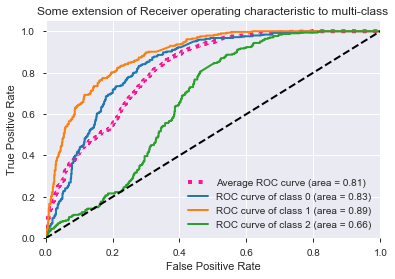

0.813977607837257

In [197]:
util_model.sk_metric_roc_auc_multiclass( 3,
                    ytrain.values, 
                    ytrain_pred,
                    ytrain_proba, 
                    )


[[152   4  37  42]
 [  5 238  37  21]
 [ 36 150  87  20]
 [124   5  23  36]]
auc average 0.8084594346044979


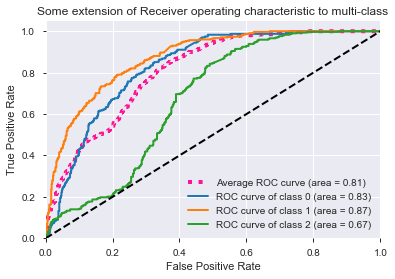

0.8084594346044979

In [198]:

util_model.sk_metric_roc_auc_multiclass( 3,
                    ytest.values, 
                    ytest_pred,
                    ytest_proba, 
                    )


In [195]:
0

0

[[193   5  25  22]
 [  7 207  61   8]
 [ 35  70 178  17]
 [ 99   3  29  58]]
auc average 0.8754914040955231


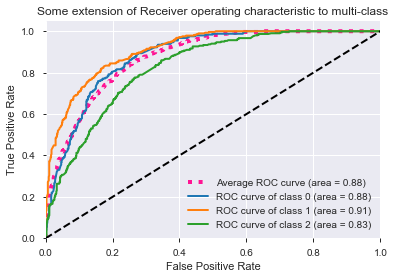

0.8754914040955231

In [194]:
util_model.sk_metric_roc_auc_multiclass( 3,
                    ytrain.values, 
                    ytrain_pred,
                    ytrain_proba, 
                    )



In [133]:
 ytrain.values

array([2, 2, 2, ..., 1, 1, 1], dtype=int64)

############# Train dataset  ####################################
Test confusion matrix
[[ 64 125]
 [ 12  25]]
[[0.33862434 0.66137566]
 [0.32432432 0.67567568]]
auc 0.5703560703560704
gini 0.14071214071214078
acc 0.3938053097345133
f1macro 0.3751992735344567
Nsample 226
              precision    recall  f1-score   support

           0       0.84      0.34      0.48       189
           1       0.17      0.68      0.27        37

   micro avg       0.39      0.39      0.39       226
   macro avg       0.50      0.51      0.38       226
weighted avg       0.73      0.39      0.45       226



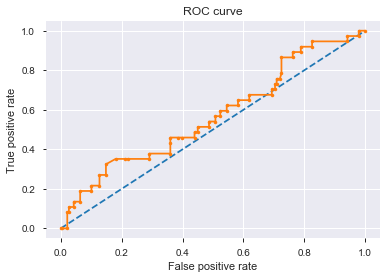

############# Test dataset  #########################################
Test confusion matrix
[[ 55 134]
 [ 10  28]]
[[0.29100529 0.70899471]
 [0.26315789 0.73684211]]
auc 0.4839877471456419
gini -0.03202450570871618
acc 0.3656387665198238
f1macro 0.3565354330708661
Nsample 227
              precision    recall  f1-score   support

           0       0.85      0.29      0.43       189
           1       0.17      0.74      0.28        38

   micro avg       0.37      0.37      0.37       227
   macro avg       0.51      0.51      0.36       227
weighted avg       0.73      0.37      0.41       227



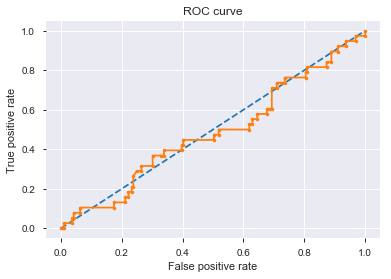

In [671]:
clf_log, clf_log_stats = util_model.sk_model_eval_classification(clf_log, 1,
                                           Xtrain, ytrain, Xtest, ytest)



In [ ]:
clf_log, dd = sk_model_eval_classification(clf_log, 1,
                                           Xtrain, ytrain, Xtest, ytest)



############# CV-0######################################
############# Train dataset  ####################################
Test confusion matrix
[[114  73]
 [ 20  19]]
[[0.60962567 0.39037433]
 [0.51282051 0.48717949]]
auc 0.5911147675853556
gini 0.18222953517071128
acc 0.588495575221239
f1macro 0.5001783548548191
Nsample 226
              precision    recall  f1-score   support

           0       0.85      0.61      0.71       187
           1       0.21      0.49      0.29        39

   micro avg       0.59      0.59      0.59       226
   macro avg       0.53      0.55      0.50       226
weighted avg       0.74      0.59      0.64       226



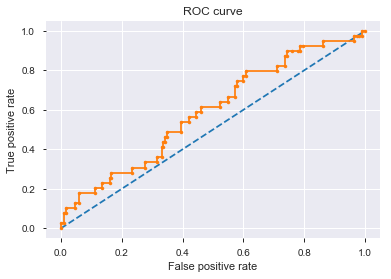

############# Test dataset  #########################################
Test confusion matrix
[[124  67]
 [ 22  14]]
[[0.64921466 0.35078534]
 [0.61111111 0.38888889]]
auc 0.5404304828388599
gini 0.08086096567771972
acc 0.6079295154185022
f1macro 0.4876106419133126
Nsample 227
              precision    recall  f1-score   support

           0       0.85      0.65      0.74       191
           1       0.17      0.39      0.24        36

   micro avg       0.61      0.61      0.61       227
   macro avg       0.51      0.52      0.49       227
weighted avg       0.74      0.61      0.66       227



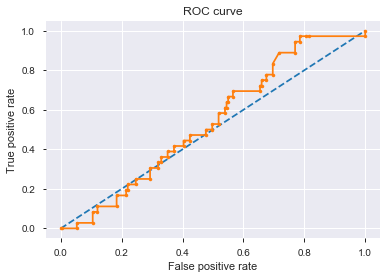

############# CV-1######################################
############# Train dataset  ####################################
Test confusion matrix
[[95 93]
 [17 21]]
[[0.50531915 0.49468085]
 [0.44736842 0.55263158]]
auc 0.5880459126539753
gini 0.17609182530795064
acc 0.5132743362831859
f1macro 0.4548245614035088
Nsample 226
              precision    recall  f1-score   support

           0       0.85      0.51      0.63       188
           1       0.18      0.55      0.28        38

   micro avg       0.51      0.51      0.51       226
   macro avg       0.52      0.53      0.45       226
weighted avg       0.74      0.51      0.57       226



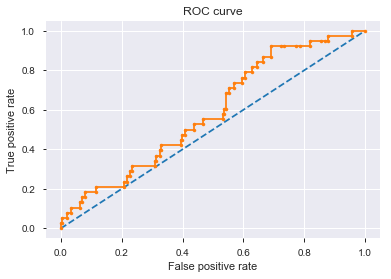

############# Test dataset  #########################################
Test confusion matrix
[[91 99]
 [20 17]]
[[0.47894737 0.52105263]
 [0.54054054 0.45945946]]
auc 0.46998577524893315
gini -0.06002844950213371
acc 0.47577092511013214
f1macro 0.4134366925064599
Nsample 227
              precision    recall  f1-score   support

           0       0.82      0.48      0.60       190
           1       0.15      0.46      0.22        37

   micro avg       0.48      0.48      0.48       227
   macro avg       0.48      0.47      0.41       227
weighted avg       0.71      0.48      0.54       227



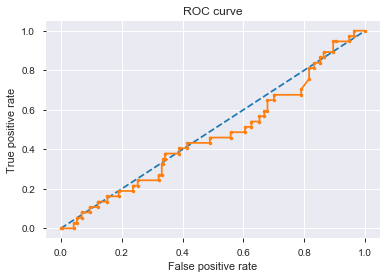

############# CV-2######################################
############# Train dataset  ####################################
Test confusion matrix
[[109  82]
 [ 12  23]]
[[0.57068063 0.42931937]
 [0.34285714 0.65714286]]
auc 0.6486910994764398
gini 0.29738219895287954
acc 0.584070796460177
f1macro 0.5136446886446886
Nsample 226
              precision    recall  f1-score   support

           0       0.90      0.57      0.70       191
           1       0.22      0.66      0.33        35

   micro avg       0.58      0.58      0.58       226
   macro avg       0.56      0.61      0.51       226
weighted avg       0.80      0.58      0.64       226



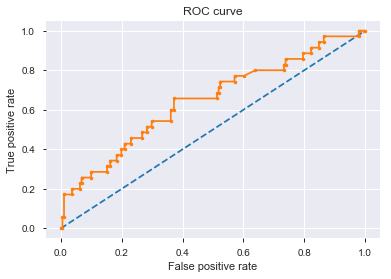

############# Test dataset  #########################################
Test confusion matrix
[[111  76]
 [ 23  17]]
[[0.59358289 0.40641711]
 [0.575      0.425     ]]
auc 0.5197860962566845
gini 0.039572192513368964
acc 0.5638766519823789
f1macro 0.47361394139554497
Nsample 227
              precision    recall  f1-score   support

           0       0.83      0.59      0.69       187
           1       0.18      0.42      0.26        40

   micro avg       0.56      0.56      0.56       227
   macro avg       0.51      0.51      0.47       227
weighted avg       0.71      0.56      0.61       227



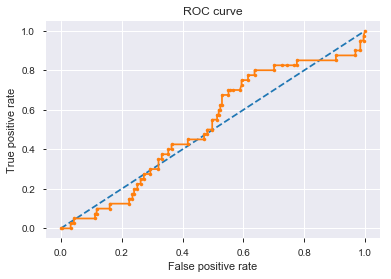

{0: LogisticRegression(C=1.0, class_weight='balanced', dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
           solver='warn', tol=0.0001, verbose=0, warm_start=False),
 1: LogisticRegression(C=1.0, class_weight='balanced', dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
           solver='warn', tol=0.0001, verbose=0, warm_start=False),
 2: LogisticRegression(C=1.0, class_weight='balanced', dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
           solver='warn', tol=0.0001, verbose=0, warm_start=False)}

In [576]:
util_model.sk_model_eval_classification_cv(clf_log,  dfX, dfy, test_size=0.5, ncv=3 )



In [582]:
clf_log_feat = util_model.sk_feature_impt(clf_log, colX, model_type="logistic" )
clf_log_feat.head(20) 



,feature,weight,weight_abs,rank
1,first_review_hash_1,-1.037341,1.037341,0
5,host_since_hash_1,-1.037341,1.037341,1
0,first_review_hash_0,0.512416,0.512416,2
4,host_since_hash_0,0.512416,0.512416,3
6,house_rules_svd_0,0.449688,0.449688,4
7,house_rules_svd_1,0.252144,0.252144,5
3,first_review_hash_3,0.076051,0.076051,6
2,first_review_hash_2,-0.035910,0.035910,7


In [583]:
clf_log_stats 

{'ytest_pred': array([ 1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,
        -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1, -1, -1,
        -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,
        -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,
         1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
         1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,
        -1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1,
         1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,
         1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,
         1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1


## Light GBM

In [99]:
params = {
          "objective" : "multiclass",
          "num_class" : 4,
          "num_leaves" : 60,
          "max_depth": -1,
          "learning_rate" : 0.01,
          "bagging_fraction" : 0.9,  # subsample
          "feature_fraction" : 0.9,  # colsample_bytree
          "bagging_freq" : 5,        # subsample_freq
          "bagging_seed" : 2018,
          "verbosity" : -1 }

from sklearn.multiclass import OneVsRestClassifier

clf_lgb = OneVsRestClassifier( lgb.LGBMClassifier(learning_rate = 0.125, 
                         max_depth= 3, n_estimators = 50, objective= "binary",
                         num_leaves = 38, njobs= -1,
                         
                         valid_sets=[lgtrain, lgval], early_stopping_rounds=100,
                                                 
           ) )



lgtrain, lgval = lgb.Dataset(Xt, Yt[:,0]), lgb.Dataset(Xtest, ytest)




In [183]:

lgtrain, lgval = lgb.Dataset(Xtrain, ytrain), lgb.Dataset(Xtest, ytest )


clf_lgb = lgb.LGBMClassifier(learning_rate = 0.125, 
                         max_depth= 3, n_estimators = 50, objective= "multiclass",
                         num_leaves = 38, njobs= -1,
                         metric="multi_logloss",       
                          
                                                 
           ) 





In [181]:
params = {
          "objective" : "multiclass",
          "num_class" : 4,
          "num_leaves" : 60,
          "max_depth": -1,
          "learning_rate" : 0.01,
          "bagging_fraction" : 0.9,  # subsample
          "feature_fraction" : 0.9,  # colsample_bytree
          "bagging_freq" : 5,        # subsample_freq
          "bagging_seed" : 2018,
          "verbosity" : -1 }


clf_lgb = lgb.train(params, lgtrain, 2000, valid_sets=[lgtrain, lgval], early_stopping_rounds=100, verbose_eval=200)


Training until validation scores don't improve for 100 rounds.
[200]	training's multi_logloss: 1.08597	valid_1's multi_logloss: 1.21582
[400]	training's multi_logloss: 1.00563	valid_1's multi_logloss: 1.21053
Early stopping, best iteration is:
[330]	training's multi_logloss: 1.02732	valid_1's multi_logloss: 1.20807


In [184]:
clf_lgb.fit(Xtrain, ytrain,)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.125, max_depth=3,
        metric='multi_logloss', min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=50,
        n_jobs=-1, njobs=-1, num_leaves=38, objective='multiclass',
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [187]:
ytrain_proba = clf_lgb.predict_proba(Xtrain)   
ytrain_pred = clf_lgb.predict(Xtrain)
        
ytest_proba = clf_lgb.predict_proba( Xtest )   
ytest_pred = clf_lgb.predict( Xtest )
        
        
    
    

[[193   5  25  22]
 [  7 207  61   8]
 [ 35  70 178  17]
 [ 99   3  29  58]]
auc average 0.8754914040955231


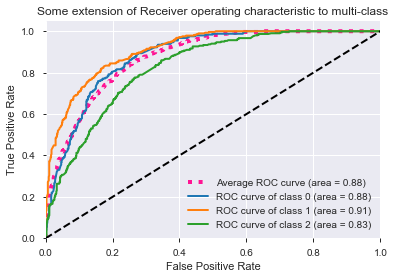

0.8754914040955231

In [192]:
util_model.sk_metric_roc_auc_multiclass( 3,
                    ytrain.values, 
                    ytrain_pred,
                    ytrain_proba, 
                    )



[[146   4  50  35]
 [ 10 202  78  11]
 [ 32  75 176  10]
 [126   2  33  27]]
auc average 0.8320696967163544


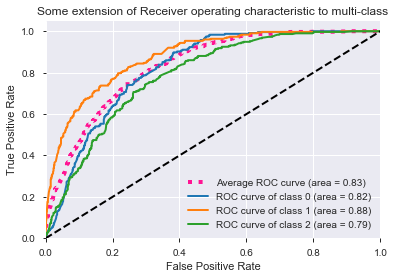

In [188]:
roc_auc_multiclass( 3,
                    ytest.values, 
                    ytest_pred,
                    ytest_proba, 
                    )



In [93]:
# clf_lgb, clf_lgb_stats  = util_model.sk_model_eval_classification(clf_lgb, 1,
#                                           Xtrain, ytrain, Xtest, ytest)

# Binarize the output
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc


ytrain = label_binarize(ytrain, classes=[0, 1, 2, 3])
n_classes = ytrain.shape[1]



clf_lgb.fit(Xtrain, ytrain)
ytrain_proba = clf_lgb.predict_proba(Xtrain)   # [:, 1]
ytrain_pred = clf_lgb.predict(Xtrain)
        
        
ytrain_proba, ytrain_pred        


(array([[2.60662763e-02, 4.23416403e-03, 9.64668275e-01, 8.21289524e-03],
        [1.37643489e-02, 5.74854982e-02, 9.16978517e-01, 2.33758880e-03],
        [1.69562253e-03, 3.07931125e-03, 9.96625355e-01, 6.96374761e-04],
        ...,
        [2.39736881e-03, 9.76357137e-01, 3.41761564e-03, 1.34845585e-03],
        [1.42206059e-03, 9.96934409e-01, 2.34759462e-03, 1.15842582e-03],
        [1.57820462e-02, 9.45702826e-01, 3.83659991e-02, 3.41647273e-03]]),
 array([[0, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        ...,
        [0, 1, 0, 0],
        [0, 1, 0, 0],
        [0, 1, 0, 0]]))

In [94]:
n_classes = len(set(ytrain_pred))


TypeError: unhashable type: 'numpy.ndarray'

In [98]:
roc_auc["micro"] 

1.0

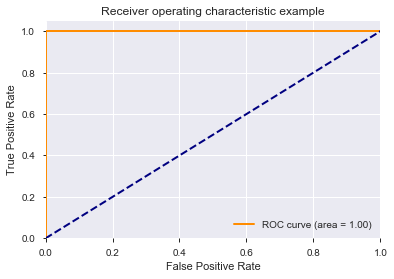

In [586]:
import shap
shap.initjs()

#dftest = pd.DataFrame( columns=colX, data=Xtest)

explainer = shap.TreeExplainer( clf_lgb )
shap_values = explainer.shap_values(  Xtest )


# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], Xtest.iloc[0,:] )





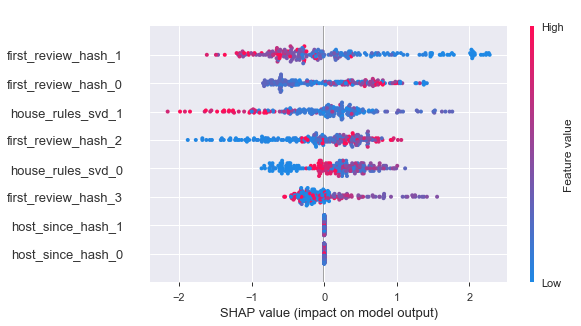

In [587]:
# Plot summary_plot as barplot:
shap.summary_plot(shap_values, Xtest)



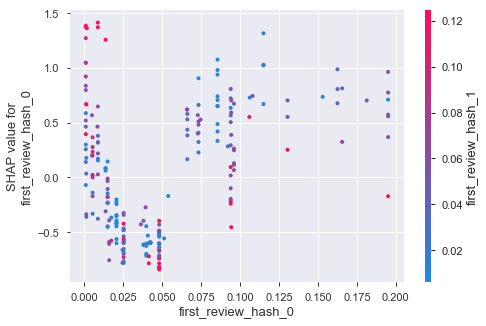

In [589]:
# visualize the training set predictions
shap.dependence_plot(  colX[0]  , shap_values, Xtest.iloc[:,:]  )





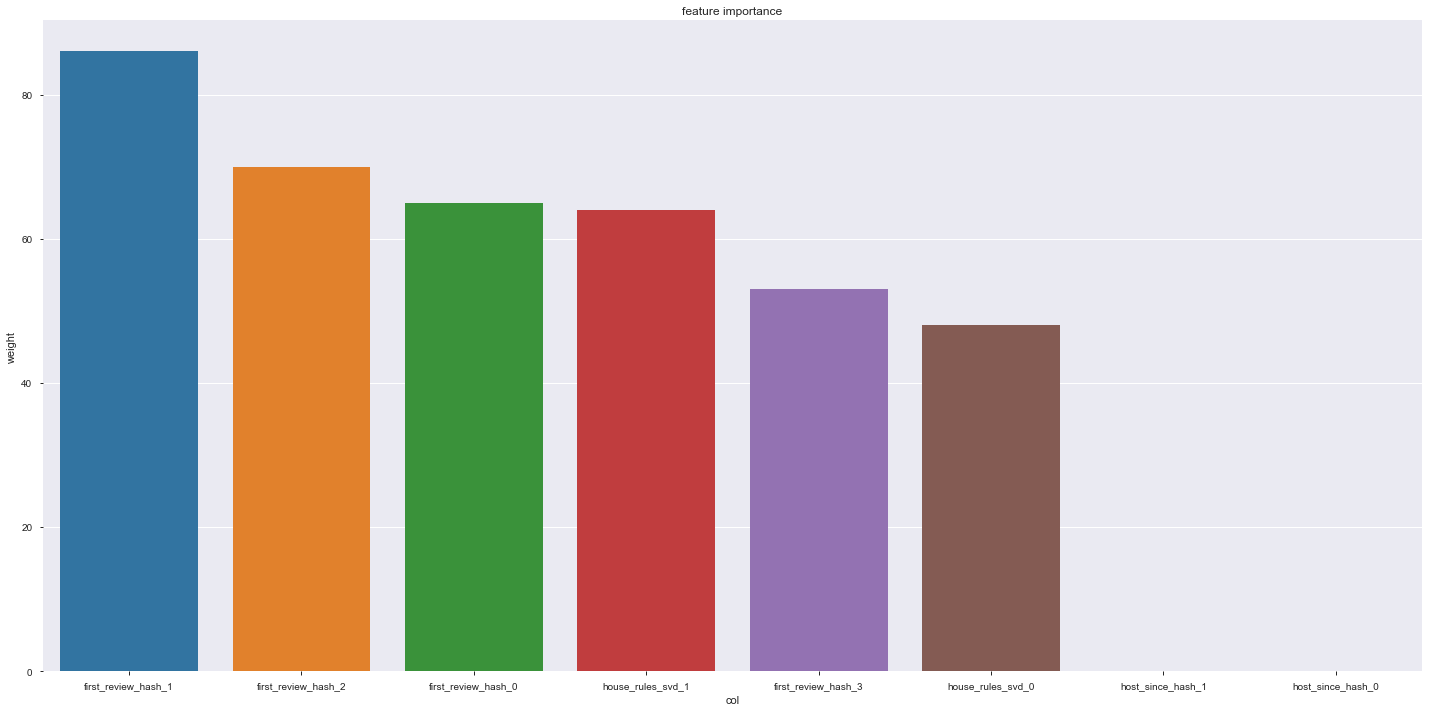

<Figure size 432x288 with 0 Axes>

In [593]:
lgb_feature_imp = util_model.sk_feature_impt(clf_lgb.feature_importances_, colname= colX, model_type="lgb")


util_plot.plotbar(lgb_feature_imp.iloc[:10,:], colname=["col", "weight"],  
                  title="feature importance", savefile="lgb_feature_imp.png") 





In [597]:
kf = StratifiedKFold(n_splits=3, shuffle=True)
# partially based on https://www.kaggle.com/c0conuts/xgb-k-folds-fastai-pca
clf_list = []
for itrain, itest in kf.split(dfX, dfy):
    print("###")
    Xtrain, Xval = dfX.loc[ itrain, : ], dfX.loc[ itest, : ]
    ytrain, yval = dfy.loc[ itrain ], dfy.loc[ itest ]
    clf_lgb.fit(Xtrain, ytrain, eval_set=[(Xval, yval)], 
            early_stopping_rounds=20)
    
    
    clf_list.append( clf_lgb)
    
    




###


KeyError: "None of [Int64Index([  0,   5,   6,   7,   8,   9,  11,  13,  16,  17,\n            ...\n            440, 441, 442, 443, 445, 446, 448, 449, 450, 451],\n           dtype='int64', name='id', length=302)] are in the [index]"

In [599]:
for i, clfi in enumerate( clf_list) :
    print(i)
    clf_lgbi, dd_lgbi = util_model.sk_model_eval_classification(clfi, 0,
                                               Xtrain, ytrain, Xtest, ytest)

    
clf_lgbi, dd_lgbi


NameError: name 'clf_lgbi' is not defined

In [65]:
def sk_showmetrics(y_test, ytest_pred, ytest_proba,
                   target_names=["0", "1"], return_stat=0):
    # Confusion matrix
    # mtest = sk_showconfusion(y_test, ytest_pred, isprint=False)
    # mtrain = sk_showconfusion( y_train , ytrain_pred, isprint=False)
    # auc = roc_auc_score(y_test, ytest_proba)  #
    #gini = 2 * auc - 1
    acc = accuracy_score(y_test, ytest_pred)
    f1macro = sk.metrics.f1_score(y_test, ytest_pred, average="macro")

    print("Test confusion matrix")
    #print(mtest[0])
    #print(mtest[1])
    # print("auc " + str(auc))
    #print("gini " + str(gini))
    print("acc " + str(acc))
    print("f1macro " + str(f1macro))
    print("Nsample " + str(len(y_test)))

    print(classification_report(y_test, ytest_pred, target_names=target_names))

    # Show roc curve
    try:
        fpr, tpr, thresholds = roc_curve(y_test, ytest_proba)
        plt.plot([0, 1], [0, 1], linestyle="--")
        plt.plot(fpr, tpr, marker=".")
        plt.xlabel("False positive rate")
        plt.ylabel("True positive rate")
        plt.title("ROC curve")
        plt.show()
    except Exception as e:
        print(e)

    if return_stat:
        return {"auc": auc, "f1macro": f1macro, "acc": acc, "confusion": mtest}

    
def sk_model_eval_classification(
        clf, istrain=1, Xtrain=None, ytrain=None, Xtest=None, ytest=None):
    if istrain:
        print("############# Train dataset  ####################################")
        clf.fit(Xtrain, ytrain)
        ytrain_proba = clf.predict_proba(Xtrain)[:, 1]
        ytrain_pred = clf.predict(Xtrain)
        sk_showmetrics(ytrain, ytrain_pred, ytrain_proba)

    print("############# Test dataset  #########################################")
    ytest_proba = clf.predict_proba(Xtest)[:, 1]
    ytest_pred = clf.predict(Xtest)
    sk_showmetrics(ytest, ytest_pred, ytest_proba)

    return clf, {"ytest_pred": ytest_pred}


print("ok")

ok


## SVM

In [66]:

clf_svc = SVC(C=1.0, probability=True) # since we need probabilities

clf_svc, clf_svc_stats = sk_model_eval_classification(clf_svc, 1,
                                               Xtrain, ytrain, Xtest, ytest)



clf.fit(Xtrain, ytrain)
ytrain_proba = clf.predict_proba(Xtrain)[:, 1]
ytrain_pred = clf.predict(Xtrain)
        
        

############# Train dataset  ####################################
Test confusion matrix
acc 0.2949852507374631
f1macro 0.11389521640091116
Nsample 1017


ValueError: Number of classes, 4, does not match size of target_names, 2. Try specifying the labels parameter

## Neural Network MLP Classifier

In [606]:

from sklearn.neural_network import MLPClassifier

clf_nn = MLPClassifier( hidden_layer_sizes=(50,), max_iter=80, alpha=1e-4,
                        activation="relu",
                        solver='adam', verbose=10, tol=1e-4, random_state=1,
                        learning_rate_init= 0.1, early_stopping=True, validation_fraction=0.2 )
                       
                     

############# Train dataset  ####################################
Iteration 1, loss = 0.71479342
Validation score: 0.782609
Iteration 2, loss = 0.45554158
Validation score: 0.782609
Iteration 3, loss = 0.43490528
Validation score: 0.782609
Iteration 4, loss = 0.46973003
Validation score: 0.782609
Iteration 5, loss = 0.46240122
Validation score: 0.782609
Iteration 6, loss = 0.43860140
Validation score: 0.782609
Iteration 7, loss = 0.42257777
Validation score: 0.782609
Iteration 8, loss = 0.42021300
Validation score: 0.782609
Iteration 9, loss = 0.42445255
Validation score: 0.782609
Iteration 10, loss = 0.42867102
Validation score: 0.782609
Iteration 11, loss = 0.42972653
Validation score: 0.782609
Iteration 12, loss = 0.42749792
Validation score: 0.782609
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Test confusion matrix
[[189   0]
 [ 37   0]]
[[1. 0.]
 [1. 0.]]
auc 0.5696410696410696
gini 0.13928213928213928
acc 0.8362831858407079
f1macro

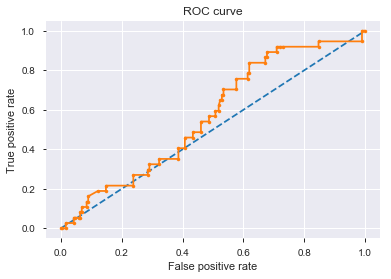

############# Test dataset  #########################################
Test confusion matrix
[[189   0]
 [ 38   0]]
[[1. 0.]
 [1. 0.]]
auc 0.46755778334725706
gini -0.06488443330548588
acc 0.8325991189427313
f1macro 0.4543269230769231
Nsample 227
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       189
           1       0.00      0.00      0.00        38

   micro avg       0.83      0.83      0.83       227
   macro avg       0.42      0.50      0.45       227
weighted avg       0.69      0.83      0.76       227



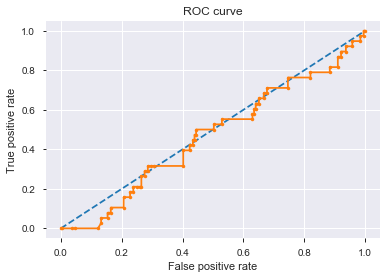

In [608]:
clf_nn, dd_nn = util_model.sk_model_eval_classification(clf_nn, 1,
                                           Xtrain, ytrain, Xtest, ytest)



# Feature selection


In [ ]:
### Feature Selection (reduce over-fitting)
   #Pre model feature selection (sometimes some features are useful even with low variance....)
   #Post model feature selection




In [613]:
### Model independant Selection
colX_kbest= util_model.sk_feature_selection(clf_nn,  method="f_classif", colname= colX, kbest="all",
                                 Xtrain= Xtrain, ytrain= ytrain)


print( colX_kbest )

['first_review_hash_0', 'first_review_hash_1', 'first_review_hash_2', 'first_review_hash_3', 'host_since_hash_0', 'host_since_hash_1', 'house_rules_svd_0', 'house_rules_svd_1']


In [618]:
colX_best = [ 'first_review_hash_0', 'first_review_hash_1', 
              'first_review_hash_2', 'first_review_hash_3', 
              'host_since_hash_0', 'host_since_hash_1', 'house_rules_svd_0']




In [614]:
clf_log_feat[ :15 ] 


,feature,weight,weight_abs,rank
1,first_review_hash_1,-1.037341,1.037341,0
5,host_since_hash_1,-1.037341,1.037341,1
0,first_review_hash_0,0.512416,0.512416,2
4,host_since_hash_0,0.512416,0.512416,3
6,house_rules_svd_0,0.449688,0.449688,4
7,house_rules_svd_1,0.252144,0.252144,5
3,first_review_hash_3,0.076051,0.076051,6
2,first_review_hash_2,-0.035910,0.035910,7


In [80]:
clf_log.fit( dfX[colX].values , df[coly].values) 

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

(226, 7) (226,)
##########  ['first_review_hash_0']
Test confusion matrix
[[128  61]
 [ 23  15]]
[[0.67724868 0.32275132]
 [0.60526316 0.39473684]]
auc 0.5822890559732665
gini 0.16457811194653305
acc 0.6299559471365639
f1macro 0.5080495356037151
Nsample 227
              precision    recall  f1-score   support

           0       0.85      0.68      0.75       189
           1       0.20      0.39      0.26        38

   micro avg       0.63      0.63      0.63       227
   macro avg       0.52      0.54      0.51       227
weighted avg       0.74      0.63      0.67       227



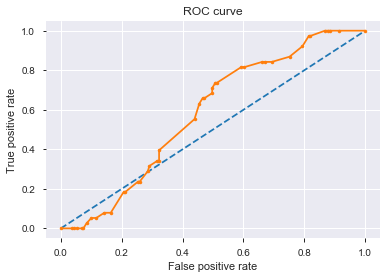

##########  ['first_review_hash_0', 'first_review_hash_1']
Test confusion matrix
[[91 98]
 [17 21]]
[[0.48148148 0.51851852]
 [0.44736842 0.55263158]]
auc 0.5714981899192425
gini 0.142996379838485
acc 0.4933920704845815
f1macro 0.4401552681807459
Nsample 227
              precision    recall  f1-score   support

           0       0.84      0.48      0.61       189
           1       0.18      0.55      0.27        38

   micro avg       0.49      0.49      0.49       227
   macro avg       0.51      0.52      0.44       227
weighted avg       0.73      0.49      0.55       227



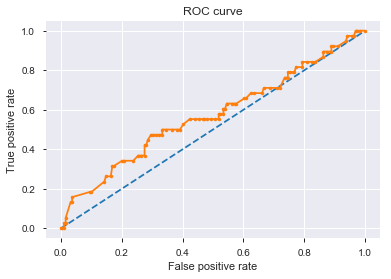

##########  ['first_review_hash_0', 'first_review_hash_1', 'first_review_hash_2']
Test confusion matrix
[[ 82 107]
 [ 14  24]]
[[0.43386243 0.56613757]
 [0.36842105 0.63157895]]
auc 0.5300055694792538
gini 0.060011138958507626
acc 0.4669603524229075
f1macro 0.42973113256514067
Nsample 227
              precision    recall  f1-score   support

           0       0.85      0.43      0.58       189
           1       0.18      0.63      0.28        38

   micro avg       0.47      0.47      0.47       227
   macro avg       0.52      0.53      0.43       227
weighted avg       0.74      0.47      0.53       227



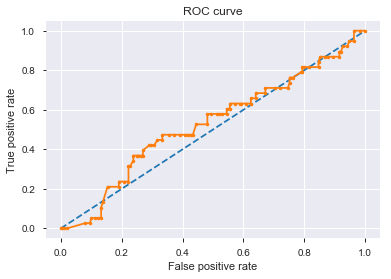

##########  ['first_review_hash_0', 'first_review_hash_1', 'first_review_hash_2', 'first_review_hash_3']
Test confusion matrix
[[ 82 107]
 [ 14  24]]
[[0.43386243 0.56613757]
 [0.36842105 0.63157895]]
auc 0.5316764132553606
gini 0.06335282651072127
acc 0.4669603524229075
f1macro 0.42973113256514067
Nsample 227
              precision    recall  f1-score   support

           0       0.85      0.43      0.58       189
           1       0.18      0.63      0.28        38

   micro avg       0.47      0.47      0.47       227
   macro avg       0.52      0.53      0.43       227
weighted avg       0.74      0.47      0.53       227



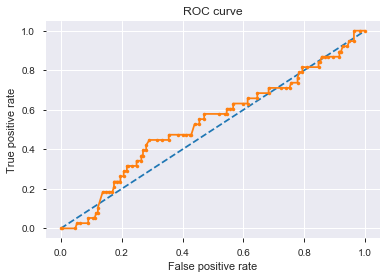

##########  ['first_review_hash_0', 'first_review_hash_1', 'first_review_hash_2', 'first_review_hash_3', 'host_since_hash_0']
Test confusion matrix
[[ 79 110]
 [ 15  23]]
[[0.41798942 0.58201058]
 [0.39473684 0.60526316]]
auc 0.5352965747702589
gini 0.07059314954051787
acc 0.44933920704845814
f1macro 0.41365486743950575
Nsample 227
              precision    recall  f1-score   support

           0       0.84      0.42      0.56       189
           1       0.17      0.61      0.27        38

   micro avg       0.45      0.45      0.45       227
   macro avg       0.51      0.51      0.41       227
weighted avg       0.73      0.45      0.51       227



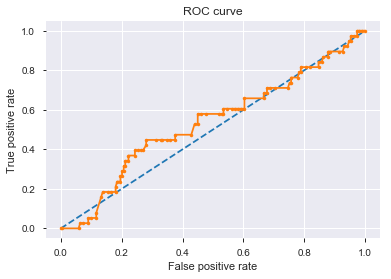

##########  ['first_review_hash_0', 'first_review_hash_1', 'first_review_hash_2', 'first_review_hash_3', 'host_since_hash_0', 'host_since_hash_1']
Test confusion matrix
[[ 88 101]
 [ 15  23]]
[[0.46560847 0.53439153]
 [0.39473684 0.60526316]]
auc 0.5423976608187135
gini 0.08479532163742709
acc 0.4889867841409692
f1macro 0.4433451716556739
Nsample 227
              precision    recall  f1-score   support

           0       0.85      0.47      0.60       189
           1       0.19      0.61      0.28        38

   micro avg       0.49      0.49      0.49       227
   macro avg       0.52      0.54      0.44       227
weighted avg       0.74      0.49      0.55       227



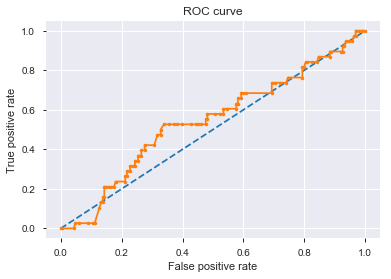

,col,auc,acc,f1macro,confusion
0,['first_review_hash_0'],0.582289,0.629956,0.508050,"([[128, 61], [23, 15]], [[0.6772486772486772, ..."
1,"['first_review_hash_0', 'first_review_hash_1']",0.571498,0.493392,0.440155,"([[91, 98], [17, 21]], [[0.48148148148148145, ..."
2,"['first_review_hash_0', 'first_review_hash_1',...",0.530006,0.466960,0.429731,"([[82, 107], [14, 24]], [[0.43386243386243384,..."
3,"['first_review_hash_0', 'first_review_hash_1',...",0.531676,0.466960,0.429731,"([[82, 107], [14, 24]], [[0.43386243386243384,..."
4,"['first_review_hash_0', 'first_review_hash_1',...",0.535297,0.449339,0.413655,"([[79, 110], [15, 23]], [[0.41798941798941797,..."
5,"['first_review_hash_0', 'first_review_hash_1',...",0.542398,0.488987,0.443345,"([[88, 101], [15, 23]], [[0.4656084656084656, ..."


In [619]:

feat_eval= util_model.sk_feature_evaluation(clf_log, dfX, 30,  
                                 colname_best=colX_best, dfy= dfy )

feat_eval


In [620]:
0

0

# Ensembling 

In [622]:
from sklearn.ensemble import VotingClassifier

clf_list = []
clf_list.append( ("clf_log", clf_log) )
clf_list.append( ("clf_lgb", clf_lgb) )
clf_list.append( ("clf_svc", clf_svc) )


clf_ens = VotingClassifier(clf_list, voting= "soft")  #Soft is required
print(clf_ens)




VotingClassifier(estimators=[('clf_log', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)), ('cl...bf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)


############# Train dataset  ####################################
Test confusion matrix
[[189   0]
 [ 33   4]]
[[1.         0.        ]
 [0.89189189 0.10810811]]
auc 0.989060489060489
gini 0.9781209781209781
acc 0.8539823008849557
f1macro 0.5574149902082962
Nsample 226
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       189
           1       1.00      0.11      0.20        37

   micro avg       0.85      0.85      0.85       226
   macro avg       0.93      0.55      0.56       226
weighted avg       0.88      0.85      0.80       226



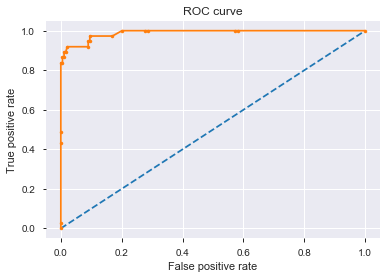

############# Test dataset  #########################################
Test confusion matrix
[[189   0]
 [ 38   0]]
[[1. 0.]
 [1. 0.]]
auc 0.606516290726817
gini 0.21303258145363402
acc 0.8325991189427313
f1macro 0.4543269230769231
Nsample 227
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       189
           1       0.00      0.00      0.00        38

   micro avg       0.83      0.83      0.83       227
   macro avg       0.42      0.50      0.45       227
weighted avg       0.69      0.83      0.76       227



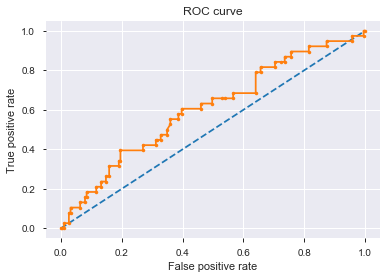

(VotingClassifier(estimators=[('clf_log', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
           solver='warn', tol=0.0001, verbose=0, warm_start=False)), ('cl...bf', max_iter=-1, probability=True, random_state=None,
   shrinking=True, tol=0.001, verbose=False))],
          flatten_transform=None, n_jobs=None, voting='soft', weights=None),
 {'ytest_pred': array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1,

In [624]:
util_model.sk_model_eval_classification(clf_ens, 1,
                                           Xtrain, ytrain, Xtest, ytest)


# Saving models

In [643]:
var_colname = [   x for x in dir() if  x.startswith("col" )] 


var_df = [   x for x in dir() if  x.startswith("df" )] 

var_pipe = [   x for x in dir() if  x.startswith("pipe" )] 

var_clf = [   x for x in dir() if  x.startswith("clf" )] 


for x in [ "var_colname", "var_df", "var_pipe", "var_clf"   ] :
   print( globals()[x]  , "\n" )





['col', 'colX', 'colX_best', 'colX_kbest', 'colall', 'colcat', 'colcat_onehot', 'coldate', 'coldate_hash_model', 'coldate_list', 'colexclude', 'colid', 'colnum', 'colnum_stat', 'coltext', 'coltext_freq', 'coltext_stopwords', 'colx_best', 'coly', 'coly_stat'] 

['df', 'dfX', 'df_list', 'df_rev_sum', 'dfcat_hot', 'dfdate_dict', 'dfdate_hash', 'dfdate_list', 'dftext', 'dftext_svd_list', 'dftext_tdidf', 'dftext_tdidf_dict', 'dfy'] 

['pipe_preprocess_coldate_01', 'pipe_preprocess_coltext', 'pipe_preprocess_coltext01', 'pipe_preprocess_coltext02'] 

['clf_ens', 'clf_lgb', 'clf_lgb_stats', 'clf_list', 'clf_log', 'clf_log_feat', 'clf_log_stats', 'clf_nn', 'clf_svc', 'clf_svc_stats'] 



In [644]:



var_list


['col',
 'colX',
 'colX_best',
 'colX_kbest',
 'colall',
 'colcat',
 'colcat_onehot',
 'coldate',
 'coldate_hash_model',
 'coldate_list',
 'colexclude',
 'colid',
 'colnum',
 'colnum_stat',
 'coltext',
 'coltext_freq',
 'coltext_stopwords',
 'colx_best',
 'coly',
 'coly_stat',
 'df',
 'dfX',
 'df_list',
 'df_rev_sum',
 'dfcat_hot',
 'dfdate_dict',
 'dfdate_hash',
 'dfdate_list',
 'dftext',
 'dftext_svd_list',
 'dftext_tdidf',
 'dftext_tdidf_dict',
 'dfy',
 'pipe_preprocess_coldate_01',
 'pipe_preprocess_coltext',
 'pipe_preprocess_coltext01',
 'pipe_preprocess_coltext02',
 'clf_ens',
 'clf_lgb',
 'clf_lgb_stats',
 'clf_list',
 'clf_log',
 'clf_log_feat',
 'clf_log_stats',
 'clf_nn',
 'clf_svc',
 'clf_svc_stats']

In [675]:
folder_model = folder + "/models/model_01/" 

var_list = var_colname + var_df + var_pipe + var_clf

util.save_all(var_list , folder_model, globals_main= globals() ) 


 

D:\_devs\Python01\gitdev\da\da/data/airbnb//models/model_01//col.pkl
D:\_devs\Python01\gitdev\da\da/data/airbnb//models/model_01//colX.pkl
D:\_devs\Python01\gitdev\da\da/data/airbnb//models/model_01//colX_best.pkl
D:\_devs\Python01\gitdev\da\da/data/airbnb//models/model_01//colX_kbest.pkl
D:\_devs\Python01\gitdev\da\da/data/airbnb//models/model_01//colall.pkl
D:\_devs\Python01\gitdev\da\da/data/airbnb//models/model_01//colcat.pkl
D:\_devs\Python01\gitdev\da\da/data/airbnb//models/model_01//colcat_onehot.pkl
D:\_devs\Python01\gitdev\da\da/data/airbnb//models/model_01//coldate.pkl
D:\_devs\Python01\gitdev\da\da/data/airbnb//models/model_01//coldate_hash_model.pkl
D:\_devs\Python01\gitdev\da\da/data/airbnb//models/model_01//coldate_list.pkl
D:\_devs\Python01\gitdev\da\da/data/airbnb//models/model_01//colexclude.pkl
D:\_devs\Python01\gitdev\da\da/data/airbnb//models/model_01//colid.pkl
D:\_devs\Python01\gitdev\da\da/data/airbnb//models/model_01//colnum.pkl
D:\_devs\Python01\gitdev\da\da/da

In [280]:
util.save(clf_log , folder_model + "/clf_predict.pkl") 


'D:\\_devs\\Python01\\gitdev\\da\\da//models/model_01//clf_predict.pkl'

In [651]:
### Validate pkl data
for x in var_list :
    print(x) 
    _ = util.load(  "{a}/{b}.pkl".format(a=folder_model, b=x  ))
   
    
    
        

col
colX
colX_best
colX_kbest
colall
colcat
colcat_onehot
coldate
coldate_hash_model
coldate_list
colexclude
colid
colnum
colnum_stat
coltext
coltext_freq
coltext_stopwords
colx_best
coly
coly_stat
df
dfX
df_list
df_rev_sum
dfcat_hot
dfdate_dict
dfdate_hash
dfdate_list
dftext
dftext_svd_list
dftext_tdidf
dftext_tdidf_dict
dfy
pipe_preprocess_coldate_01
pipe_preprocess_coltext
pipe_preprocess_coltext01
error Ran out of input
pipe_preprocess_coltext02
error Ran out of input
clf_ens
clf_lgb
clf_lgb_stats
clf_list
clf_log
clf_log_feat
clf_log_stats
clf_nn
clf_svc
clf_svc_stats


# Predict values

In [659]:
#### Load data
dft = pd.read_csv(folder + 'listings_summary.zip', delimiter=',')

print(dft.shape)
dft.head(3)


(453, 96)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,...,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-11-07,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,t,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25


In [660]:
#### Model folder
print( folder_model )

##### Column names
coly = "price"
colid = "id"


dft = dft.set_index( colid)






D:\_devs\Python01\gitdev\da\da/data/airbnb//models/model_01/


In [ ]:
##### Pre-Process Giobally
dft = dft.replace("?",  np.nan)




In [194]:
dft.head(3)

,name_levenshtein_simple,name_trigram_simple,name_levenshtein_term,name_trigram_term,city_levenshtein_simple,city_trigram_simple,city_levenshtein_term,city_trigram_term,zip_levenshtein_simple,zip_trigram_simple,...,phone_levenshtein,phone_trigram,fax_levenshtein,fax_trigram,street_number_levenshtein,street_number_trigram,phone_equality,fax_equality,street_number_equality,is_match
id,,,,,,,,,,,,,,,,,,,,,
1204#1207,0.666667,0.666667,0.400000,0.526316,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,m,m,s,1
1272#1279,0.666667,0.666667,0.411765,0.444444,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,m,m,s,1
6258#6259,1.000000,1.000000,1.000000,1.000000,1,1,1,1,1,1,...,1.0,1.0,NaN,NaN,1.0,1.0,s,m,s,1


In [195]:
#### Pre-processing  ##############################################
dft_cat = util_feature.pd_pipeline_apply( dft[colcat].iloc[:,:], 
                                            pipe_preprocess_colcat )  



dft_cat.head(4)

############## Pipeline  0 Start (28235, 3) pd_col_fillna
phone_equality 0 replaceBY -1
fax_equality 0 replaceBY -1
street_number_equality 0 replaceBY -1
############## Pipeline   0 Finished (28235, 3)
############## Pipeline  1 Start (28235, 3) pd_col_to_onehot
phone_equality 3 (28235, 3)
fax_equality 3 (28235, 5)
street_number_equality 3 (28235, 7)
phone_equality_0 added
phone_equality_1 added
phone_equality_2 added
fax_equality_0 added
fax_equality_1 added
fax_equality_2 added
street_number_equality_0 added
street_number_equality_1 added
street_number_equality_2 added
############## Pipeline   1 Finished (28235, 9)


,phone_equality_0,phone_equality_1,phone_equality_2,fax_equality_0,fax_equality_1,fax_equality_2,street_number_equality_0,street_number_equality_1,street_number_equality_2
id,,,,,,,,,
1204#1207,0,0,0,0,0,0,0,0,0
1272#1279,0,0,0,0,0,0,0,0,0
6258#6259,0,0,0,0,0,0,0,0,0
16076#16077,0,0,0,0,0,0,0,0,0


In [196]:
#### Pre-processing   #################################################
dft_num = util_feature.pd_pipeline_apply( dft[colnum].iloc[:,:], 
                                            pipe_preprocess_colnum )  

dft_num.head(4)



############## Pipeline  0 Start (28235, 26) pd_col_to_num
############## Pipeline   0 Finished (28235, 26)
############## Pipeline  1 Start (28235, 26) pd_colnum_tocat
name_levenshtein_simple
                            name_levenshtein_simple                           
                                                min   size      mean       max
name_levenshtein_simple_bin                                                   
0                                               0.0   3244  0.133234  0.199916
1                                               0.2   4352  0.284679  0.399802
2                                               0.4   4713  0.495519  0.599206
3                                               0.6   4992  0.679888  0.797778
4                                               0.8  10934  0.945298  1.000000
name_trigram_simple
                        name_trigram_simple                           
                                        min   size      mean       max
name_trigram_

 4                             1.000000  
street_trigram_simple
                          street_trigram_simple                           
                                            min   size      mean       max
street_trigram_simple_bin                                                 
-1                                          NaN  19997       NaN       NaN
 0                                          0.0   1669  0.038069  0.198485
 1                                          0.2   1020  0.281841  0.399669
 2                                          0.4    575  0.499309  0.596875
 3                                          0.6   1026  0.706532  0.793651
 4                                          0.8   3948  0.958941  1.000000
street_levenshtein_term
                            street_levenshtein_term                           
                                                min   size      mean       max
street_levenshtein_term_bin                                                   


 4                             1.000000  
street_number_trigram
                          street_number_trigram                           
                                            min   size      mean       max
street_number_trigram_bin                                                 
-1                                          NaN   9852       NaN       NaN
 0                                          0.0    551  0.073064  0.181818
 1                                          0.2   3084  0.270634  0.375000
 2                                          0.4    684  0.447116  0.571429
 4                                          1.0  14064  1.000000  1.000000
############## Pipeline   1 Finished (28235, 26)
############## Pipeline  2 Start (28235, 26) pd_col_to_onehot
name_levenshtein_simple_bin 5 (28235, 26)
name_trigram_simple_bin 5 (28235, 30)
name_levenshtein_term_bin 5 (28235, 34)
name_trigram_term_bin 5 (28235, 38)
city_levenshtein_simple_bin 6 (28235, 42)
city_trigram_simple_bin 6 (

,name_levenshtein_simple_bin_0,name_levenshtein_simple_bin_1,name_levenshtein_simple_bin_2,name_levenshtein_simple_bin_3,name_levenshtein_simple_bin_4,name_trigram_simple_bin_0,name_trigram_simple_bin_1,name_trigram_simple_bin_2,name_trigram_simple_bin_3,name_trigram_simple_bin_4,...,street_number_levenshtein_bin_0,street_number_levenshtein_bin_1,street_number_levenshtein_bin_2,street_number_levenshtein_bin_3,street_number_levenshtein_bin_4,street_number_trigram_bin_-1,street_number_trigram_bin_0,street_number_trigram_bin_1,street_number_trigram_bin_2,street_number_trigram_bin_4
id,,,,,,,,,,,,,,,,,,,,,
1204#1207,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1272#1279,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
6258#6259,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
16076#16077,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [667]:
#### Pre-processing   #################################################
coldate = util.load( folder_model + "/coldate.pkl") 
print(coldate)
dft_date = util_feature.pd_pipeline_apply( dft[ coldate ].iloc[:,:], 
                                           pipe_preprocess_coldate_01 )  

dft_date.head(4)


['first_review', 'host_since']
############## Pipeline  0 Start (453, 2) pd_coltext_fillna
############## Pipeline   0 Finished (453, 2)
############## Pipeline  1 Start (453, 2) pd_coltext_minhash
############## Pipeline   1 Finished (453, 6)


,first_review_hash_0,first_review_hash_1,first_review_hash_2,first_review_hash_3,host_since_hash_0,host_since_hash_1
0,0.015973,0.054575,0.053763,0.000065,0.085544,0.012219
1,0.072877,0.108171,0.026549,0.021042,0.092159,0.111353
2,0.092159,0.020624,0.014038,0.039355,0.085544,0.028555
3,0.005336,0.012219,0.006054,0.026590,0.014960,0.014379


In [662]:
#### Pre-processing   #################################################
coltext = util.load( folder_model + "/coltext.pkl") 
print(coltext)
dft_text = util_feature.pd_pipeline_apply( dft[coltext].iloc[:,:], 
                                           pipe_preprocess_coltext01 )  

dft_text.head(4)


['house_rules', 'neighborhood_overview', 'notes', 'street']
############## Pipeline  0 Start (453, 4) pd_coltext_clean
############## Pipeline   0 Finished (453, 1)
############## Pipeline  1 Start (453, 1) pd_coltext_tdidf
############## Pipeline   1 Finished (453, 95)
############## Pipeline  2 Start (453, 95) pd_dim_reduction
############## Pipeline   2 Finished (453, 2)


,house_rules_svd_0,house_rules_svd_1
0,0.282025,-0.036450
1,0.000000,0.000000
2,0.453837,-0.059220
3,0.340081,-0.056896


In [668]:
#### Merge data , Create data
df_final = pd.concat(( #dft_cat, 
                       #dft_num,
                       dft_date,
                       dft_text
                     
                     ), axis=1)

col_final = list( df_final.columns )
df_final.head(5)


colX  = util.load(folder_model + "colX.pkl")
df_final[colX].head(3)




,first_review_hash_0,first_review_hash_1,first_review_hash_2,first_review_hash_3,host_since_hash_0,host_since_hash_1,house_rules_svd_0,house_rules_svd_1
0,0.015973,0.054575,0.053763,0.000065,0.085544,0.012219,0.282025,-0.03645
1,0.072877,0.108171,0.026549,0.021042,0.092159,0.111353,0.000000,0.00000
2,0.092159,0.020624,0.014038,0.039355,0.085544,0.028555,0.453837,-0.05922


In [688]:
#### Model Load
clf_prod = util.load(folder_model + "clf_log.pkl")

print(clf_prod)

dfX =  util.load(folder_model + "dfX.pkl")
dfy =  util.load(folder_model + "dfy.pkl")

dfX["ytest_"] =   clf_prod.predict( dfX.iloc[:,:])


print( dfX["ytest_"], dfy )
print(dfy)



LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
423    1
424    1
425    1
426    1
427   -1
428   -1
429    1
430    1
431    1
432   -1
433    1
434    1
435    1
436    1
437   -1
438    1
439    1
440    1
441   -1
442    1
443   -1
444    1
445   -1
446    1
447   -1
448    1
449   -1
450    1
451    1
452    1
Name: ytest_, Length: 453, dtype: int64 id
2015     -1
2695     -1
3176     -1
3309     -1
7071     -1
9991      1
14325    -1
16401     1
16644    -1
17409    -1
17904    -1
20858 

In [689]:
#### Predict  
dft[coly] = clf_prod.predict( df_final[colX].iloc[:,:])
print(coly)







price


In [694]:
dft.sample(frac=0.2).head(5)

SyntaxError: invalid syntax (<ipython-input-694-2df333f68707>, line 1)

In [695]:
dft[coly].sample(frac=0.2).head(10) 

id
192050    1
183206    1
38296     1
46161     1
450325   -1
266181    1
188565   -1
346404    1
242794    1
370561   -1
Name: price, dtype: int64

In [696]:
###### Export 
dft = dft.reset_index()
dft[[ colid, coly  ]].to_csv( folder_out + "adress_pred.csv" , index=False, mode="w")




NameError: name 'folder_out' is not defined

69